# Introduction

The `numpy` module is optimized for array operations that are frequently used in computational mathematics. This is supported by two features of `numpy` arrays: *vectorization* and *broadcasting*.

Vectorization refers to operations and functions that operate "in parallel" on all elements of an array. This does not mean that the operations are actually done in parallel, but that `numpy` is able to do the operation using C loops, which are much faster than Python loops. Vectorization can also take advantage of CPU and GPU architectures that support parallelization.

Broadcasting extends mathematical operations for arrays of different shape. It is a form of vectorization that leads to code that is expressive, easy to read and efficient.

Before running this notebook, let's import the modules and functions we will use:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Vectorized operations and functions

Operations and functions on `numpy` arrays are *vectorized*. This means that they operate on all elements of an array "simultaneously". For example, let's compute the value of $\sin(x)$ for the elements of an array:

In [3]:
xvalues = np.linspace(0, np.pi, 5)
yvalues = np.sin(xvalues)
print(xvalues)
print(yvalues)

[0.         0.78539816 1.57079633 2.35619449 3.14159265]
[0.00000000e+00 7.07106781e-01 1.00000000e+00 7.07106781e-01
 1.22464680e-16]


The function call `np.linspace(0, np.pi, 5)` returns an array of 5 points between $0$ and $\pi$. Notice that, contrary to the usual Python convention, `linspace()` *does* include the endpoint of the interval.

Next, notice the function call `np.sin(xvalues)`. This computes the value of $\sin(x)$ for all elements of the array. Behind the scenes, `numpy` passes the function call to precompiled code written in the C language, which results in much faster execution times.

To see how much faster the code is, let's compare the time of computation for a large array. First, let's do the computation using Python lists and a loop:

In [4]:
%%timeit
n = 10000
yvalues = (n + 1) * [0.0]
for i in range(n+1):
    yvalues[i] = np.sin((i / n) * np.pi)

7.26 ms ± 102 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Notice the `%%timeit` special instruction at the beginning of the cell. This kind of instruction is called a "cell magic". In this particular case, the cell is run a number of loops, and the average run time is recorder. Before checking the running time using `numpy` arrays, let's see if the execution time improves if we use a list comprehension instead of a `for` loop:

In [5]:
%%timeit
n = 10000
yvalues = [np.sin((i / n) * np.pi) for i in range(n+1)]

7.04 ms ± 87.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


You'll probably notice that there is a slight improvement in running time. Let's now compare it with the `numpy` code:

In [6]:
%%timeit
xvalues = np.linspace(0, np.pi, 5)
yvalues = np.sin(xvalues)

25 µs ± 188 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Notice that the execution is much faster now. The exact times will vary depending on the computer you are using. When we run this code in the list comprehension mode, execution takes about 5.7 milliseconds on the average. In the `numpy` version, it takes 23 *micro*seconds. So, the vectorized version is about 250 times faster! This is a bit unusual, in more typical situations the `numpy` code will be about 10 times faster than the standard Python code.

It is also possible to define our own vectorized functions. The simplest way to do this is to use `numpy` vectorized functions. In this case, we essentially get the vectorization for free. As an example, suppose we want to define a function that computes the expression:
$$
e^{-t}(a\cos(t)+b\sin(t))
$$
This function represents an attenuated linear oscillation, which is studied in an introductory diferential equations course. In this expression, $a$ and $b$ are constants related to the initial conditions for the oscillation, and are scalars. The variable $t$, however, may be an array. Here is how we can define a version of this function that is automatically vectorized:

In [7]:
def oscillation(t, a, b):
    return np.exp(-t) * (a * np.cos(t) + b * np.sin(t))

We can use this function now to plot the oscillations:

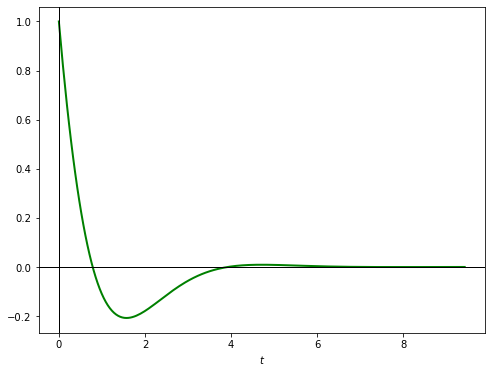

In [8]:
plt.figure(figsize=(8, 6))
tvalues = np.linspace(0, 3 * np.pi, 200)
yvalues = oscillation(tvalues, 1, -1)
plt.plot(tvalues, yvalues, lw=2, color='green')
plt.axvline(0, lw=1, color='black')
plt.axhline(0, lw=1, color='black')
plt.xlabel('$t$')
None

Just recall the following rule of thumb: Always use the `numpy` versions of mathematical functions, and your code will be automatically vectorized.

Another built-in vectorization feature in `numpy` are the *componentwise operators*. `numpy` defines a componentwise operator for each of the Python arithmetic operators. Let's consider the following example:

In [9]:
n = 100
# Define two arrays with random entries in the interval [0,1].
a = np.random.rand(n)
b = np.random.rand(n)
# Add the two arrays component by component
c = a + b
print(a[:5])
print(b[:5])
print(c[:5])

[0.19052373 0.03263947 0.49211354 0.33088568 0.70207627]
[0.2593982  0.64345313 0.69149856 0.51600359 0.10566543]
[0.44992193 0.67609261 1.1836121  0.84688926 0.8077417 ]


In this example, the assignment `c = a + b`, behind the scenes, adds the vector using a fast loop through precompiled C code, instead of using the Python interpreter. This results in much faster execution.

# Array Functions

Another `numpy` feature that helps write faster code are functions that operate on whole arrays. The most commonly used of these are:

- `np.sum()`: computes the sum of the entries of an array.
- `np.max()`: computes the largest entry of an array.
- `np.min()`: computes the smallest entry of an array.
- `np.prod()`: computes the product of the elements of an array:

As an example, let's see how to compute the sum of the elements of an array. We start with defining an array with random entries:

In [17]:
n = 1000
a = np.random.rand(n)
a[:10]

array([0.26060605, 0.17979217, 0.34612529, 0.42217511, 0.52875733,
       0.86591006, 0.31491744, 0.5796741 , 0.97815252, 0.63851656])

Let's now compute the sum of the elements using a Python `for` loop:

In [18]:
%%timeit
array_sum = 0.0
for j in range(n):
    array_sum += a[j]

131 µs ± 2.24 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Let's now compute the sum using the `np.sum()` function:

In [19]:
%%timeit
array_sum = np.sum(a)

3.61 µs ± 19.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Again, we see that using the `numpy` function yields much faster code.

What happens when we call `np.sum()` for a two-dimensional array? The next example illustrates it:

In [20]:
n = 5
a = np.array([[i+n*j for i in range(n)] for j in range(n)])
print(a)
array_sum = np.sum(a)
print(array_sum)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
300


The expression `np.sum(a)` computes the sum of all elements in the array `a`. Another frequent operation is to compute the sum of the rows or columns of a matrix. For example, to compute the row sum we can use:

In [21]:
row_sum = np.sum(a, axis=0)
print(row_sum)

[50 55 60 65 70]


The option `axis=0` specifies that the sum should be computed "along axis 0". This means that the statement above is equivalent to the following loop:

In [27]:
row_sum_1 = 0
for i in range(5):
    row_sum_1 += a[i,:]
print(row_sum_1)

[50 55 60 65 70]


The code using `np.sum()` is, of course, much faster, and should be preferred. To find the sum of the columns, we can use:

In [28]:
col_sum = np.sum(a, axis=1)
print(col_sum)

[ 10  35  60  85 110]


# Broadcasting

Look carefully at the code in the following cell. Notice that there is something strange about it.

In [36]:
m, n = 5, 4
a = np.array([[i+n*j for i in range(m)] for j in range(n)])
print(a)
b = np.array([i for i in range(m)])
print(b)
c = a + b
print(c)

[[ 0  1  2  3  4]
 [ 4  5  6  7  8]
 [ 8  9 10 11 12]
 [12 13 14 15 16]]
[0 1 2 3 4]
[[ 0  2  4  6  8]
 [ 4  6  8 10 12]
 [ 8 10 12 14 16]
 [12 14 16 18 20]]


The assignment `c = a + b` looks strange, doesn't it? The arrays `a` and `b` have shapes `(4,5)` and `(4,)`, and, in mathematical notation, it is not possible to add arrays of different shapes. 

Here, `numpy` is using a feature called *broadcasting*. This is what is happening in the background:

- `numpy` realizes that the shape array `[0 1 2 3 4]` matches the number of *columns* of the array `a`.
- The array `b` is then "broadcast" to match the number of rows of `a`. That is, the array `b` is replaced by:

        np.array([[0, 1, 2, 3, 4],
                  [0, 1, 2, 3, 4],
                  [0, 1, 2, 3, 4],
                  [0, 1, 2, 3, 4]])
                  
- The arrays are then added. The overall result is adding the vector `b` to each row of `a`.

Notice that the array `b` is interpreted as a *row vector* here. Notice that the following yields an error:

In [41]:
m, n = 5, 4
a = np.array([[i+n*j for i in range(m)] for j in range(n)])
print(a)
b = np.array([i for i in range(n)])
print(b)
c = a + b
print(c)

[[ 0  1  2  3  4]
 [ 4  5  6  7  8]
 [ 8  9 10 11 12]
 [12 13 14 15 16]]
[0 1 2 3]


ValueError: operands could not be broadcast together with shapes (4,5) (4,) 

If we want to add a vector to the columns of `a` we need code as follows:

In [43]:
m, n = 5, 4
a = np.array([[i+n*j for i in range(m)] for j in range(n)])
print(a)
b = np.array([i for i in range(n)]).reshape(n,1)
print(b)
c = a + b
print(c)

[[ 0  1  2  3  4]
 [ 4  5  6  7  8]
 [ 8  9 10 11 12]
 [12 13 14 15 16]]
[[0]
 [1]
 [2]
 [3]]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


Notice the use of `reshape(n,1)`. This makes the array `b` represent a column vector, and `numpy` is smart enough to realize that, in the expression `a + b`, `b` should be broadcast along the columns of `a`.

A final case in which broadcasting is very common is when doing a scalar operation. For example, to multiply all entries of an array by a scalar, we can use code as follows:

In [46]:
m, n = 5, 4
a = np.array([[i+n*j for i in range(m)] for j in range(n)])
print(a)
a_times_2 = 2 * a
print(a_times_2)

[[ 0  1  2  3  4]
 [ 4  5  6  7  8]
 [ 8  9 10 11 12]
 [12 13 14 15 16]]
[[ 0  2  4  6  8]
 [ 8 10 12 14 16]
 [16 18 20 22 24]
 [24 26 28 30 32]]


Broadcasting is very powerful when combining with slicing. The example in the following cell shows how to add a constant to a column of a matrix:

In [45]:
m, n = 5, 4
a = np.array([[i+n*j for i in range(m)] for j in range(n)])
print(a)
a[:, 4] += 3
print(a)

[[ 0  1  2  3  4]
 [ 4  5  6  7  8]
 [ 8  9 10 11 12]
 [12 13 14 15 16]]
[[ 0  1  2  3  7]
 [ 4  5  6  7 11]
 [ 8  9 10 11 15]
 [12 13 14 15 19]]


The result of the code is to add the constant $3$ to the fourth column (column 3) of the array `a`. Notice that the array `a` is modified "in place" in this example.

# Matrix Products

One situation where there is a great gain in efficiency is when computing matrix products. To experiment with this concept, let's generate a random matrix and a vector.

In [47]:
n = 100
A = np.random.rand(n, n)
v = np.random.rand(n)

Let's now compute $Av$ using nested `for` loops, according to the definition of matrix-vector product:

In [48]:
%%timeit
w = np.zeros(n)
for i in range(n):
    for j in range(n):
        w[i] += A[i,j] * v[j]

4.12 ms ± 48.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Let's now compute it using the `dot()` method of array objects:

In [44]:
%%timeit
w = A.dot(v)

1.27 µs ± 19.6 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


It should be clear that using the `numpy` version is, again, much faster. 

Instead of using the `dot()` method, we can use the `@` operator, which is specially defined for matrix products.

In [50]:
%%timeit
w = A @ v

1.99 µs ± 63.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Notice that using `@` is somewhat slower than using `dot()`. So, even though using `@` yields code that is easier to read, we should use `dot()` if speed is essential.

# Exercises

**1.** The *Trapezoid Rule* to approximate an integral is given by the formula:
$$
\int_{a}^{b}f(x)\,dx \approx \frac{1}{2}\sum_{j=0}^{n-1}(f(x_{j+1})+f(x_j))\Delta x_j
$$
where $\Delta x_j=x_{j+1}-x_j$. 

**a)** Write code to implement the Trapezoid Rule using vectorized functions. Test your code with the following two integrals:
$$
\int_0^1 x^2\,dx,\quad \int_0^2 e^{x}\,dx
$$

**b)** Define a function with signature:

    trapezoid(f, a, b, nintervals)
    
that approximates $\int_a^bf(x)\,dx$ using a trapezoid approximation with `nintervals` subintervals. Then, use your code to approximate the integral:
$$
\int_0^2 e^{-x^2}\,dx
$$

**2.** Run the cell below to generate a matrix `A` and a vector `v`. Then, write code that computes the following items. Your code should use vectorized `numpy` functions. Try to find a solution that uses only *one line of code* for each item.

**a)** Adds 2 to each entry of `A`.

**b)** Adds the vector `v` to each row of `A`.

**c)** Adds the vector `v` to each column of `A`.

**d)** Finds the largest value of `A`.

**e)** Finds the largest value of each column of `A`. The result should be a vector with 5 elements.

**f)** Finds the largest value of each row of `A`. Ther result will also be a vector with 5 elements

**g)** Computes the sum of the squares of all entries of `A`

**h)** Computes the product of the columns of `A` with indexes 1, 2 and 3.

**i)** Computes the product of the rows of `A` with indexes 1, 2 and 3.

In [51]:
n = 5
A = np.random.rand(5, 5)
v = np.random.rand(5)